In [1]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python sklearn matplotlib

In [18]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [19]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [20]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [21]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION)            #face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)            #pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)       #left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)      #right hand connections

In [22]:
def draw_styled_landmarks(image, results):
    #draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    #draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    #draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    #draw right hand connection
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

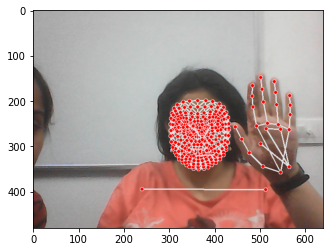

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test

array([ 0.58435404,  0.59462613, -1.24989927, ...,  0.        ,
        0.        ,  0.        ])

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.58435404,  0.59462613, -1.24989927, ...,  0.        ,
        0.        ,  0.        ])

In [20]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('_Data_') 

# Actions that we try to detect
# actions = np.array(['hello','thank you','iloveu'])
actions = np.array(['hello','thank you','namaste','yes','teacher','how are you','five','one','c','u'])
# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
# start_folder = 30

In [21]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [22]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [24]:
label_map = {label:num for num, label in enumerate(actions)}

In [25]:
label_map

{'hello': 0, 'thank you': 1, 'iloveu': 2}

In [26]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [27]:
sequences

[[array([ 0.61042428,  0.4242841 , -0.78354287, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.60483152,  0.41415313, -1.22245002, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.60436243,  0.41287982, -1.20107937, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.60335213,  0.41290417, -1.28171241, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.60224867,  0.41268077, -1.27933884, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.60203272,  0.41153297, -1.15937829, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.60192025,  0.41095561, -1.18573797, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.59792453,  0.41091678, -1.20723987, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.59321791,  0.41093314, -1.21333432, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.58809596,  0.4112832 , -1.2032485 , ...,  0.        ,
       

In [28]:
np.array(sequences).shape

(90, 30, 1662)

In [29]:
np.array(labels).shape

(90,)

In [30]:
X = np.array(sequences)

In [31]:
X.shape

(90, 30, 1662)

In [32]:
y = to_categorical(labels).astype(int)

In [33]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [35]:
y_test.shape

(5, 3)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [37]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [38]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [39]:
# res = [.7, 0.2, 0.1]
res = [0.7, 0.2, 0.1,0.4,0.3,0.1,0.2,0.4,0.5,0.6]

In [40]:
actions[np.argmax(res)]

'hello'

In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 88ms/step - loss: 1.6185 - categorical_accuracy: 0.3176
Epoch 2/2000
3/3 [==============================] - 0s 114ms/step - loss: 15.3001 - categorical_accuracy: 0.3529
Epoch 3/2000
3/3 [==============================] - 0s 106ms/step - loss: 9.3022 - categorical_accuracy: 0.3882
Epoch 4/2000
3/3 [==============================] - 0s 88ms/step - loss: 19.1574 - categorical_accuracy: 0.3176
Epoch 5/2000
3/3 [==============================] - 0s 90ms/step - loss: 20.6456 - categorical_accuracy: 0.3412
Epoch 6/2000
3/3 [==============================] - 0s 87ms/step - loss: 18.6321 - categorical_accuracy: 0.2824
Epoch 7/2000
3/3 [==============================] - 0s 90ms/step - loss: 13.7721 - categorical_accuracy: 0.4235
Epoch 8/2000
3/3 [==============================] - 0s 88ms/step - loss: 22.6470 - categorical_accuracy: 0.3529
Epoch 9/2000
3/3 [==============================] - 0s 90ms/step - loss: 36.5133 - categorical_accuracy:

3/3 [==============================] - 0s 111ms/step - loss: 0.1514 - categorical_accuracy: 0.9529
Epoch 146/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.1350 - categorical_accuracy: 0.9647
Epoch 147/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.1941 - categorical_accuracy: 0.8824
Epoch 148/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.1765 - categorical_accuracy: 0.9176
Epoch 149/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.1727 - categorical_accuracy: 0.9412
Epoch 150/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.1571 - categorical_accuracy: 0.9647
Epoch 151/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.3260 - categorical_accuracy: 0.8706
Epoch 152/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.2428 - categorical_accuracy: 0.9176
Epoch 153/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.1597 - categorical_accura

Epoch 217/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.0500 - categorical_accuracy: 0.9882
Epoch 218/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.0562 - categorical_accuracy: 0.9882
Epoch 219/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.0780 - categorical_accuracy: 0.9765
Epoch 220/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.0281 - categorical_accuracy: 0.9882
Epoch 221/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0473 - categorical_accuracy: 1.0000
Epoch 222/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0541 - categorical_accuracy: 0.9765
Epoch 223/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0293 - categorical_accuracy: 1.0000
Epoch 224/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0531 - categorical_accuracy: 0.9882
Epoch 225/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.1494 - cat

3/3 [==============================] - 0s 102ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 361/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0300 - categorical_accuracy: 0.9882
Epoch 362/2000
3/3 [==============================] - 0s 103ms/step - loss: 6.5675 - categorical_accuracy: 0.5647
Epoch 363/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.7913 - categorical_accuracy: 0.6235
Epoch 364/2000
3/3 [==============================] - 0s 103ms/step - loss: 3.5816 - categorical_accuracy: 0.2824
Epoch 365/2000
3/3 [==============================] - 0s 100ms/step - loss: 2.9015 - categorical_accuracy: 0.3529
Epoch 366/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.7611 - categorical_accuracy: 0.3647
Epoch 367/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.5237 - categorical_accuracy: 0.4118
Epoch 368/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.2549 - categorical_accurac

3/3 [==============================] - 0s 106ms/step - loss: 1.0802 - categorical_accuracy: 0.3765
Epoch 433/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.4036 - categorical_accuracy: 0.3765
Epoch 434/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.0346 - categorical_accuracy: 0.3882
Epoch 435/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.0296 - categorical_accuracy: 0.3882
Epoch 436/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.0262 - categorical_accuracy: 0.3647
Epoch 437/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.0275 - categorical_accuracy: 0.3529
Epoch 438/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.0206 - categorical_accuracy: 0.3529
Epoch 439/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.0154 - categorical_accuracy: 0.3529
Epoch 440/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.0124 - categorical_accura

Epoch 504/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.7506 - categorical_accuracy: 0.6235
Epoch 505/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.7312 - categorical_accuracy: 0.6471
Epoch 506/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.7383 - categorical_accuracy: 0.6118
Epoch 507/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.7306 - categorical_accuracy: 0.6353
Epoch 508/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.6878 - categorical_accuracy: 0.6353
Epoch 509/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6771 - categorical_accuracy: 0.6353
Epoch 510/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6804 - categorical_accuracy: 0.6588
Epoch 511/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.7415 - categorical_accuracy: 0.6353
Epoch 512/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.6746 - cat

Epoch 647/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.3803 - categorical_accuracy: 0.8118
Epoch 648/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.3535 - categorical_accuracy: 0.8353
Epoch 649/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.3817 - categorical_accuracy: 0.8353
Epoch 650/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.4519 - categorical_accuracy: 0.7294
Epoch 651/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.3708 - categorical_accuracy: 0.8235
Epoch 652/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.3563 - categorical_accuracy: 0.8588
Epoch 653/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.3466 - categorical_accuracy: 0.8471
Epoch 654/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.3711 - categorical_accuracy: 0.8235
Epoch 655/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.4372 - cat

3/3 [==============================] - 0s 100ms/step - loss: 0.3370 - categorical_accuracy: 0.8471
Epoch 791/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.3357 - categorical_accuracy: 0.8588
Epoch 792/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.3309 - categorical_accuracy: 0.8471
Epoch 793/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.3450 - categorical_accuracy: 0.7765
Epoch 794/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.3266 - categorical_accuracy: 0.8235
Epoch 795/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.3199 - categorical_accuracy: 0.8235
Epoch 796/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.3060 - categorical_accuracy: 0.8824
Epoch 797/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.2932 - categorical_accuracy: 0.8824
Epoch 798/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.3179 - categorical_accurac

3/3 [==============================] - 0s 101ms/step - loss: 0.2574 - categorical_accuracy: 0.8471
Epoch 935/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.2456 - categorical_accuracy: 0.9059
Epoch 936/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.2413 - categorical_accuracy: 0.8941
Epoch 937/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.2214 - categorical_accuracy: 0.9059
Epoch 938/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.3511 - categorical_accuracy: 0.8118
Epoch 939/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.3475 - categorical_accuracy: 0.8235
Epoch 940/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.4988 - categorical_accuracy: 0.7412
Epoch 941/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.4100 - categorical_accuracy: 0.7882
Epoch 942/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.2590 - categorical_accurac

3/3 [==============================] - 0s 124ms/step - loss: 0.3105 - categorical_accuracy: 0.8471
Epoch 1078/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.3467 - categorical_accuracy: 0.8118
Epoch 1079/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.3012 - categorical_accuracy: 0.8588
Epoch 1080/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.2585 - categorical_accuracy: 0.9176
Epoch 1081/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.2728 - categorical_accuracy: 0.8824
Epoch 1082/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.2171 - categorical_accuracy: 0.9294
Epoch 1083/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.2441 - categorical_accuracy: 0.8941
Epoch 1084/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.1857 - categorical_accuracy: 0.9529
Epoch 1085/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.2292 - categorica

3/3 [==============================] - 0s 112ms/step - loss: 0.1284 - categorical_accuracy: 0.9529
Epoch 1220/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.1440 - categorical_accuracy: 0.9647
Epoch 1221/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.1757 - categorical_accuracy: 0.9412
Epoch 1222/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.1176 - categorical_accuracy: 0.9765
Epoch 1223/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.0870 - categorical_accuracy: 0.9882
Epoch 1224/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.1362 - categorical_accuracy: 0.9412
Epoch 1225/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.1091 - categorical_accuracy: 0.9647
Epoch 1226/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.1503 - categorical_accuracy: 0.9412
Epoch 1227/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.0985 - categorica

3/3 [==============================] - 0s 109ms/step - loss: 0.2999 - categorical_accuracy: 0.8588
Epoch 1362/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.4715 - categorical_accuracy: 0.8118
Epoch 1363/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.4228 - categorical_accuracy: 0.8000
Epoch 1364/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.3623 - categorical_accuracy: 0.8235
Epoch 1365/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.3206 - categorical_accuracy: 0.8706
Epoch 1366/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.2221 - categorical_accuracy: 0.8941
Epoch 1367/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.2994 - categorical_accuracy: 0.8353
Epoch 1368/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.2696 - categorical_accuracy: 0.8706
Epoch 1369/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.2402 - categorica

3/3 [==============================] - 0s 100ms/step - loss: 0.1074 - categorical_accuracy: 0.9647
Epoch 1504/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.1195 - categorical_accuracy: 0.9412
Epoch 1505/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.1304 - categorical_accuracy: 0.9412
Epoch 1506/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.1243 - categorical_accuracy: 0.9529
Epoch 1507/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.1755 - categorical_accuracy: 0.9412
Epoch 1508/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.0874 - categorical_accuracy: 0.9882
Epoch 1509/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.1034 - categorical_accuracy: 0.9647
Epoch 1510/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0934 - categorical_accuracy: 0.9647
Epoch 1511/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0762 - categorical_a

3/3 [==============================] - 0s 108ms/step - loss: 0.0194 - categorical_accuracy: 1.0000
Epoch 1646/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.0188 - categorical_accuracy: 1.0000
Epoch 1647/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0206 - categorical_accuracy: 1.0000
Epoch 1648/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0194 - categorical_accuracy: 1.0000
Epoch 1649/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0188 - categorical_accuracy: 1.0000
Epoch 1650/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0181 - categorical_accuracy: 1.0000
Epoch 1651/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0172 - categorical_accuracy: 1.0000
Epoch 1652/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0192 - categorical_accuracy: 1.0000
Epoch 1653/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.0190 - categorica

3/3 [==============================] - 0s 106ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 1788/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.0030 - categorical_accuracy: 1.0000
Epoch 1789/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 1790/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 1791/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 1792/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 1793/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 1794/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 1795/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0026 - categorica

3/3 [==============================] - 0s 106ms/step - loss: 6.8595e-04 - categorical_accuracy: 1.0000
Epoch 1929/2000
3/3 [==============================] - 0s 106ms/step - loss: 6.7120e-04 - categorical_accuracy: 1.0000
Epoch 1930/2000
3/3 [==============================] - 0s 109ms/step - loss: 6.7010e-04 - categorical_accuracy: 1.0000
Epoch 1931/2000
3/3 [==============================] - 0s 113ms/step - loss: 6.5633e-04 - categorical_accuracy: 1.0000
Epoch 1932/2000
3/3 [==============================] - 0s 110ms/step - loss: 6.5038e-04 - categorical_accuracy: 1.0000
Epoch 1933/2000
3/3 [==============================] - 0s 120ms/step - loss: 6.5144e-04 - categorical_accuracy: 1.0000
Epoch 1934/2000
3/3 [==============================] - 0s 104ms/step - loss: 6.4066e-04 - categorical_accuracy: 1.0000
Epoch 1935/2000
3/3 [==============================] - 0s 110ms/step - loss: 6.3720e-04 - categorical_accuracy: 1.0000
Epoch 1936/2000
3/3 [==============================] - 0s 102ms/

Epoch 1997/2000
3/3 [==============================] - 0s 104ms/step - loss: 3.9018e-04 - categorical_accuracy: 1.0000
Epoch 1998/2000
3/3 [==============================] - 0s 105ms/step - loss: 3.7944e-04 - categorical_accuracy: 1.0000
Epoch 1999/2000
3/3 [==============================] - 0s 104ms/step - loss: 3.7614e-04 - categorical_accuracy: 1.0000
Epoch 2000/2000
3/3 [==============================] - 0s 103ms/step - loss: 3.7338e-04 - categorical_accuracy: 1.0000


In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [45]:
res = model.predict(X_test)

In [46]:
actions[np.argmax(res[0])]

'iloveu'

In [47]:
actions[np.argmax(y_test[0])]

'iloveu'

In [48]:
model.save('action.h5')

In [98]:
# del model

In [49]:
model.load_weights('action.h5')

In [50]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [51]:
yhat = model.predict(X_test)

In [52]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [53]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [54]:
accuracy_score(ytrue, yhat)

1.0

In [56]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

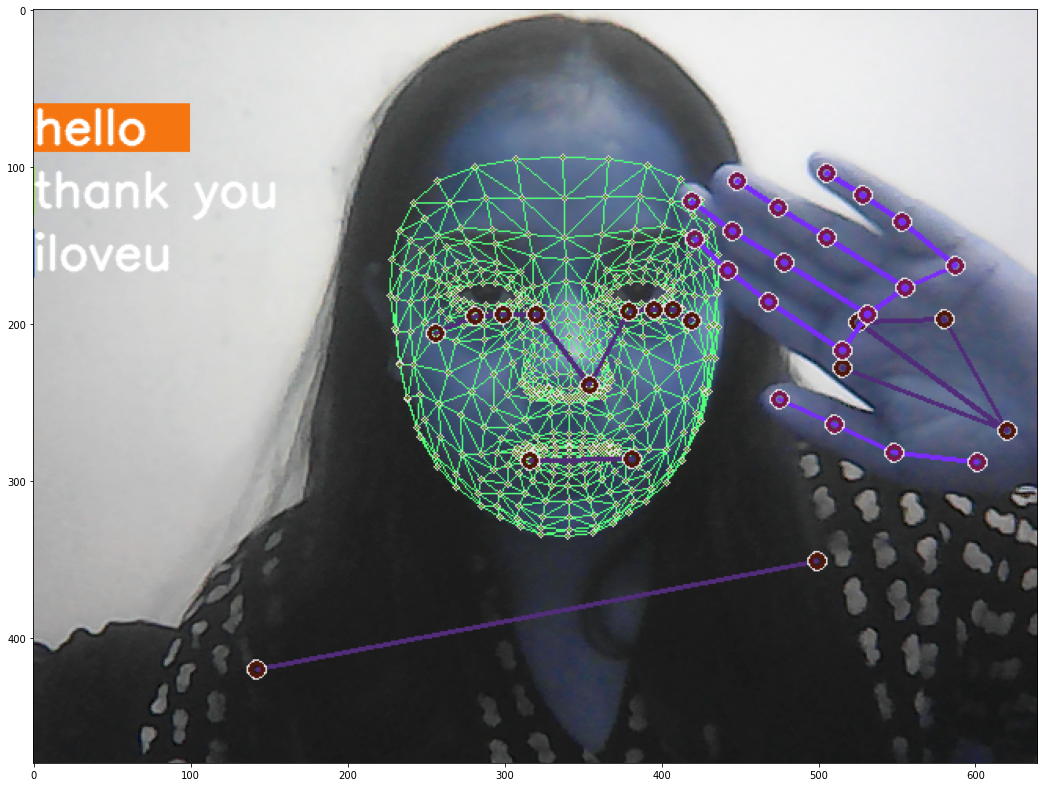

In [57]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [58]:
sequence.reverse()

In [59]:
len(sequence)

30

In [60]:
sequence.append('def')

In [61]:
sequence.reverse()

In [62]:
sequence[-30:]

[array([ 0.43565178,  0.30872318, -1.52011764, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.43503737,  0.31017551, -1.51485991, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.43883982,  0.31399831, -1.38115621, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.44925147,  0.32590583, -1.40120625, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.45489326,  0.33300012, -1.44976246, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.48569578,  0.35897648, -1.71422732, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.49563655,  0.37000144, -1.77350688, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.5229786 ,  0.39501163, -1.70826054, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.55864745,  0.42016363, -1.23225439, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.5659216 ,  0.43039474, -1.10315716, ...,  0.        ,
         0.        ,  0.  

In [117]:
# sequence = []
# sentence = []
# threshold = 0.4
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():

#         # Read feed
#         ret, frame = cap.read()

#         # Make detections
#         image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
#         # Draw landmarks
#         draw_styled_landmarks(image, results)
#          # 2. Prediction logic
#         keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
# #         sequence = sequence[:30]
# #         sequence.append(keypoints)
#         sequence = sequence[:30]
        
#         if len(sequence) == 30:
#             res = model.predict(np.expand_dims(sequence, axis=0))[0]
#             print(actions[np.argmax(res)])
#          #3. Viz logic
#         if res[np.argmax(res)] > threshold: 
#             if len(sentence) > 0: 
#                 if actions[np.argmax(res)] != sentence[-1]:
#                     sentence.append(actions[np.argmax(res)])
#             else:
#                 sentence.append(actions[np.argmax(res)])

#         if len(sentence) > 5: 
#             sentence = sentence[-5:]

#         # Viz probabilities
#         image = prob_viz(res, actions, image, colors)

#         cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
#         cv2.putText(image, ' '.join(sentence), (3,30), 
#                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)    
        

#         # Show to screen
#         cv2.imshow('OpenCV Feed', image)

#         # Break gracefully
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
#     cap.release()
#     cv2.destroyAllWindows()

In [63]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.1

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                
            
            #3. Viz logic
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

        # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveu
<class 'mediapipe.python.solution_base.Solution

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveu
<class 'mediapipe.python.solution_base.Solutio

In [109]:
cap.release()
cv2.destroyAllWindows()

In [110]:
res[np.argmax(res)] > threshold

True

In [67]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[1.871747e-09, 5.435642e-08, 1.000000e+00]], dtype=float32)

In [68]:
import pickle

In [69]:
pickle.dump(model,open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://d2d8c866-a1e9-4b8e-a6c3-690d88266eed/assets


INFO:tensorflow:Assets written to: ram://d2d8c866-a1e9-4b8e-a6c3-690d88266eed/assets


In [70]:
# model=pickle.load(open('model.pkl','rb'))
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


In [74]:
model1=keras.models.load_model('my_model')

In [72]:
from tensorflow import keras

In [77]:
sequence = []
sentence = []
predictions = []
threshold = 0.1

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model1.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                
            
            #3. Viz logic
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

        # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'